# Notebook 2:  Clustering con GMM y Algoritmos Jerárquicos

En este notebook vamos a implementar el algoritmo de clustering de Mezcla de Normales en R. El objetivo es entender como funciona este algoritmo y  aprender a utilizarlo con un ejemplo simple. Se incluye además la estrategia para definir el número de grupos k. Al final se propone un ejercicio con nuevos datos, con el fin de aprender a utilizar el algoritmo. 

In [10]:
#install.packages("mclust")
#install.packages("cluster")
library(mclust)
library(cluster)
#ruta datos
#lee datos del archivo de texto como una matriz. La primera #columna se utiliza como vector de nombres de las filas
datos <-read.table("..//data//semillas1.txt",dec=".")
summary(datos)

       V1              V2              V3              V4       
 Min.   :10.59   Min.   :12.41   Min.   :4.899   Min.   :2.630  
 1st Qu.:12.27   1st Qu.:13.45   1st Qu.:5.262   1st Qu.:2.944  
 Median :14.36   Median :14.32   Median :5.524   Median :3.237  
 Mean   :14.85   Mean   :14.56   Mean   :5.629   Mean   :3.259  
 3rd Qu.:17.30   3rd Qu.:15.71   3rd Qu.:5.980   3rd Qu.:3.562  
 Max.   :21.18   Max.   :17.25   Max.   :6.675   Max.   :4.033  
       V5              V6       
 Min.   :0.765   Min.   :4.519  
 1st Qu.:2.562   1st Qu.:5.045  
 Median :3.599   Median :5.223  
 Mean   :3.700   Mean   :5.408  
 3rd Qu.:4.769   3rd Qu.:5.877  
 Max.   :8.456   Max.   :6.550  

---------------------------------------------------- 
Gaussian finite mixture model fitted by EM algorithm 
---------------------------------------------------- 

Mclust EEV (ellipsoidal, equal volume and shape) model with 4 components: 

 log-likelihood   n df       BIC       ICL
       177.3167 210 93 -142.6475 -157.7975

Clustering table:
 1  2  3  4 
67 75 23 45 

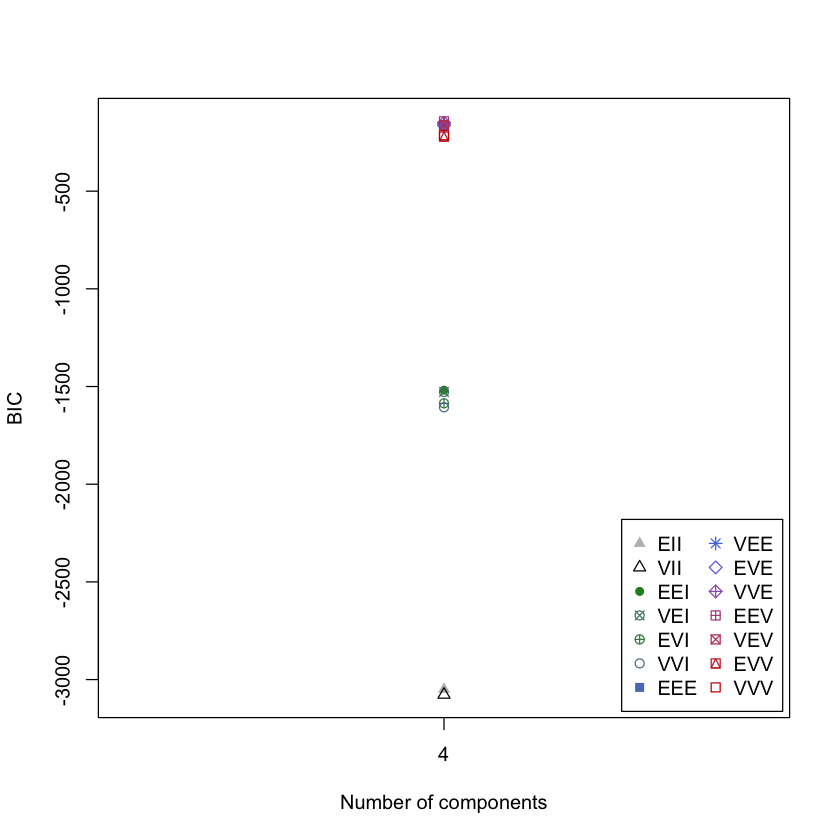

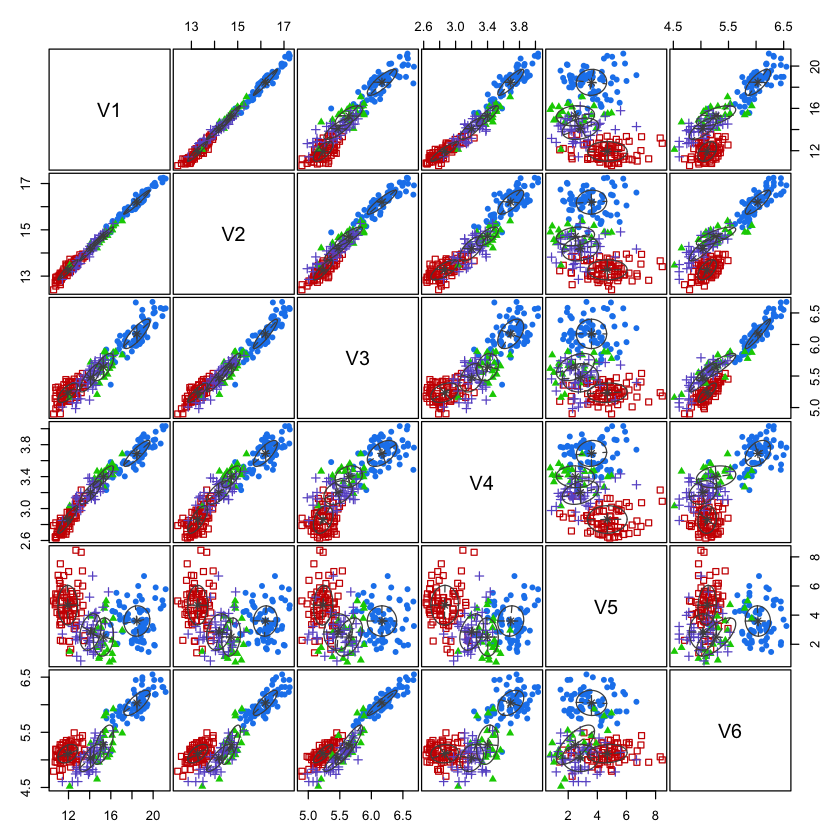

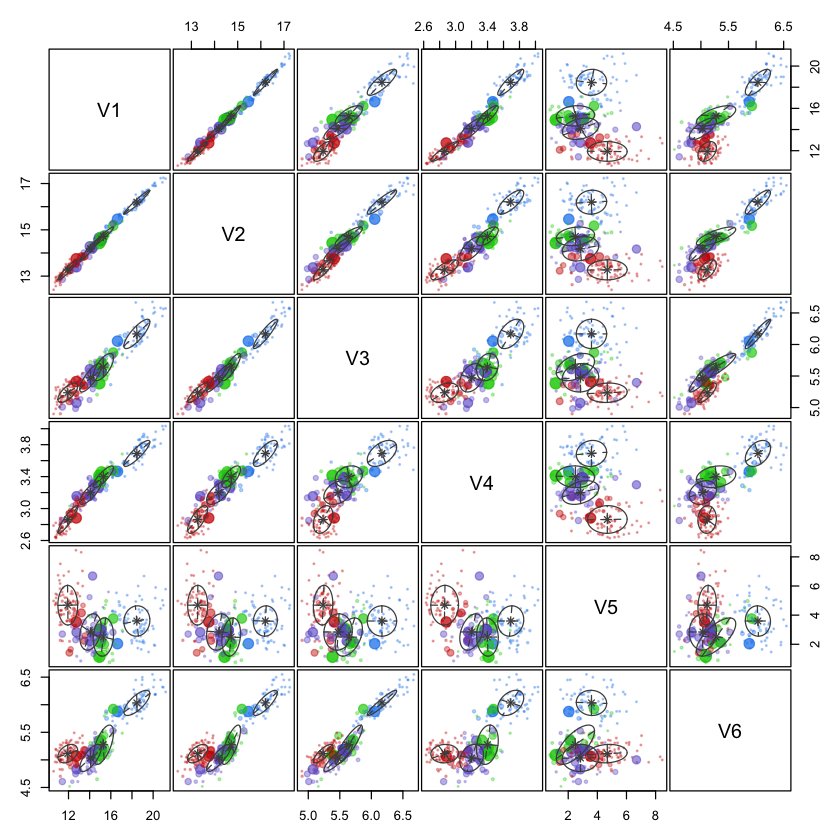

'Mclust' model object: (EEV,4) 

Available components: 
 [1] "call"           "data"           "modelName"      "n"             
 [5] "d"              "G"              "BIC"            "loglik"        
 [9] "df"             "bic"            "icl"            "hypvol"        
[13] "parameters"     "z"              "classification" "uncertainty"   

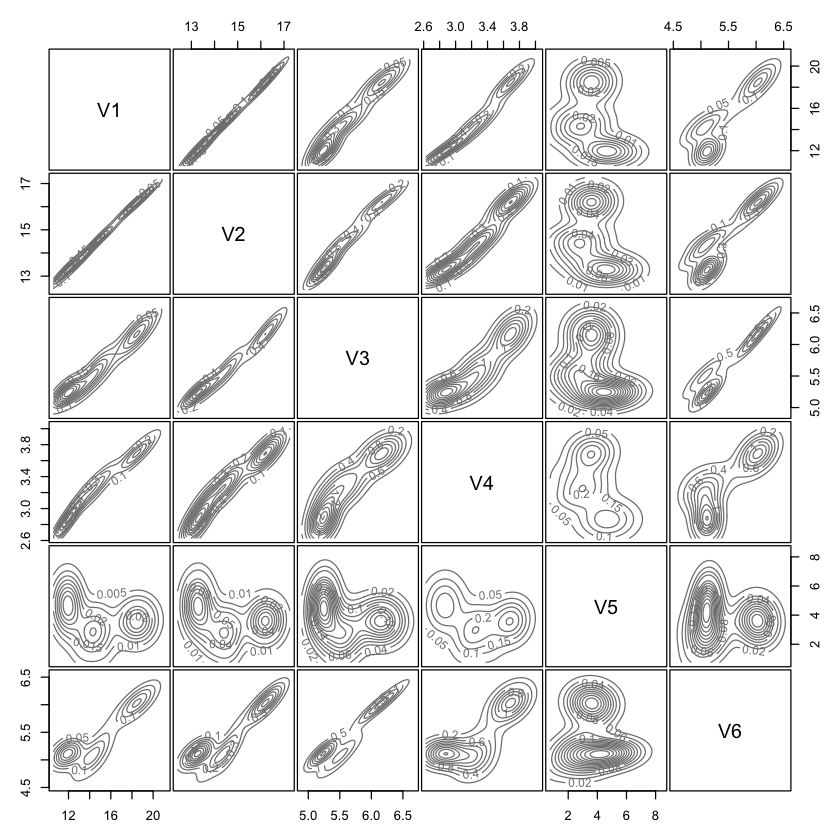

In [44]:
clus <-Mclust(datos, G=4)
summary(clus)
plot(clus)
clus




In [45]:
cl <- clus$classification
centers <- t(clus$parameters$mean)
centers
cl

V1       V2       V3       V4       V5       V6      
[1,] 18.46213 16.19470 6.167813 3.690301 3.596481 6.033091
[2,] 11.93175 13.27016 5.234781 2.863010 4.682985 5.113286
[3,] 15.29414 14.71759 5.641832 3.398164 2.495003 5.274619
[4,] 14.07522 14.18237 5.472207 3.200684 2.842341 5.035122

1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18  19  20 
  1   1   1   2   4   4   3   4   1   4   2   3   1   1   1   2   2   3   1   2 
 21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36  37  38  39  40 
  2   1   4   2   2   3   2   4   4   1   4   4   2   3   1   1   1   2   4   2 
 41  42  43  44  45  46  47  48  49  50  51  52  53  54  55  56  57  58  59  60 
  2   2   1   2   2   1   1   2   2   2   1   4   1   2   4   4   1   3   1   2 
 61  62  63  64  65  66  67  68  69  70  71  72  73  74  75  76  77  78  79  80 
  4   1   4   4   1   4   1   3   1   2   1   3   1   1   4   1   4   1   4   1 
 81  82  83  84  85  86  87  88  89  90  91  92  93  94  95  96  97  98  99 100 
  1   3   3   4   1   2   4   2   2   2   2   2   4   2   3   2   1   2   2   2 
101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117 118 119 120 
  2   2   1   2   3   4   4   3   4   3   1   4   2   2   2   3   4   3   2   4 
121 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 
  2   1   2   2   1   1   4   4   3   3   4   2   2   1   1   1   2   3   1   3 
141 142 143 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 
  1   2   1   2   2   1   2   2   1   1   2   4   2   2   2   2   1   4   2   3 
161 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180 
  1   1   1   4   3   4   2   4   2   2   4   2   2   4   1   1   1   4   1   4 
181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198 199 200 
  2   1   2   4   4   1   1   1   1   2   2   2   2   1   1   2   2   2   4   1 
201 202 203 204 205 206 207 208 209 210 
  1   2   3   2   4   2   1   1   2   1

**Ejercicio 1:**

a) Explique como funciona el método Mclust, describa los principales parámetros de entrada y salida.

b) Interprete y comente los resultados obtenidos. 

**RESPUESTA A**
El método Mclust es un enfoque de clustering que se basa en modelos de mezcla gaussiana finita parametrizada. En este método, los datos se agrupan en clústeres utilizando una combinación de distribuciones gaussianas. La estimación de estos modelos se realiza mediante el algoritmo de Expectation-Maximization (EM), que es inicializado por un proceso de clustering aglomerativo basado en modelos jerárquicos.

# Parametros

* data -> Un vector numerico, matriz, o dataframe de observaciones. permite realizar el clustering
* G    -> Vector entero especificando el numero de clusters para los cuales el BIC es calculado
* modelNames -> Vector de strings indicando los modelos para ser ajustados en el algoritmo  EM del clustering
* prior ->  permite la especificacion de prior en las media y varianzas mediante la funcion priorControl
* control -> lista de parametros de control para EM
* initialization -> Una lista que contiene cero o mas componentes(eg: hcPairs,subset,noise)
* warn -> Un valor lógico que indica si el sistema puede o no generar alertas.
* x -> Un objeto de la clase mclustBIC. Si se proporciona el objeto "x", los valores BIC (Bayesian Information Criterion) para los modelos que ya han sido calculados y están disponibles en "x" no se vuelven a calcular.
* verbose -> Un valor booleano que indica si se desea habilitar la sesión interactiva o no.
* log-likegood -> Medida de calidad de ajuste de un modelo a un conjunto de datos observados, indica probabilidad de observar datos dados los parametros del modelo. 

en las salidas tenemos las siguientes componentes:

* modelName -> string que describo eel modelo que se  obtuvo un valor optimo del BIC
* BIG -> todos los valores BiC calculados. 
* ICL -> log de verosimilitud del modelo con big optimo.
* df -> Numero de parametros estimados. 
* Z -> matriz que sus compomentes [i,k] es la probabilidad que la observacion i en el data set partenezca a la clase k. 
* parameeters -> pro, mean y variance: proporcion, media y varianza estimadas de cada clase.

**RESPUESTA B**
Log-likelihood : 177.3167 -> al  cruzar el umbral de 100, describe los datos de muy buena manera. 
Los valores BIC e ICL (-142.6475 y -157.7975 respectivamente) Al ser ambos negativos indica que el modelo ajustado es mejor que otros alternativos, debido a que mientras menor sean los valores mejor sera su ajuste. 

observaciones asignadas:
- Hay 67 observaciones asignadas al cluster 1
- Hay 75 observaciones asignadas al cluster 2
- Hay 23 observaciones asignadas al cluster 3
- Hay 45 observaciones asignadas al cluster 4



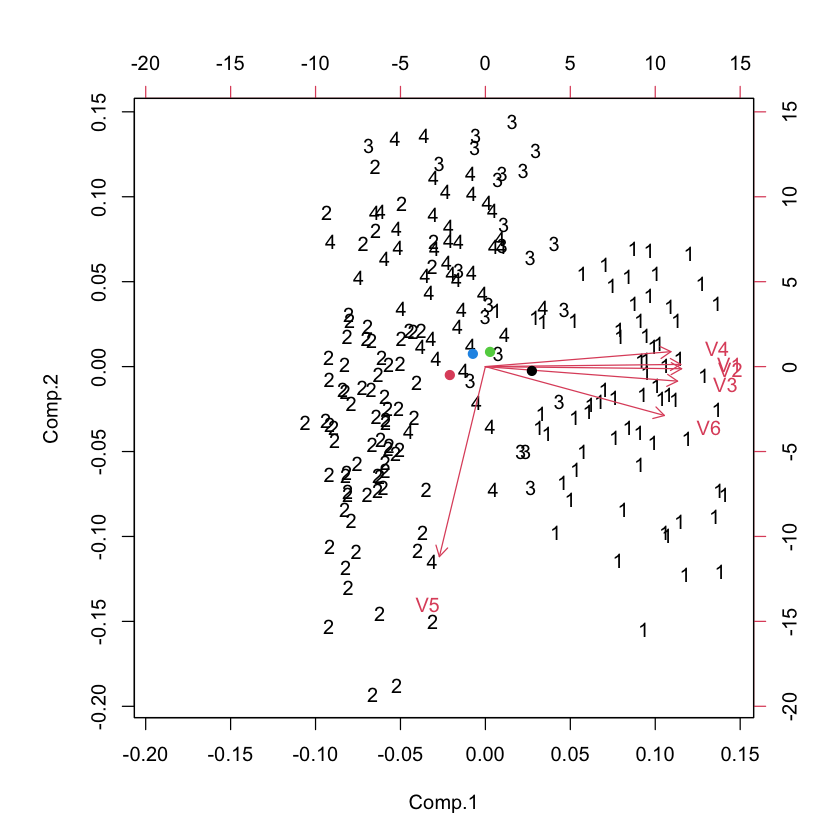

In [13]:
#Análisis de Componentes Principales para graficar los grupos obtenidos
#Calcula plano de componentes principales y grafica las observaciones con el número de su grupo
res <- princomp(datos, cor=TRUE)
res2 <- predict(res,centers)

biplot(res,xlabs=cl)
#grafica los centros de cada grupo en el plano de componentes principales utilizando colores distintos
points(res2[,1:2],col=1:9,pch=19)


**Criterio de Información Bayesiano**

Una forma de discriminar entre posibles agrupamientos, es calcular el Criterio de Información Bayesiano, cuya expresión genérica es:
$$BIC = log L(Datos\mid \hat{\theta}) - \frac{d}{2}log(N)$$
donde $d$ es el número de parámetros libres y $N$ el número de observaciones. A medida que aumenta el número de parámetros la verosimilitud aumenta, pero esto es moderado por el término en que depende de $d$.

Mclust calcula automática el BIC para distintas configuraciones de las matrices covarianza de cada Normal multivariada (que corresponden a distintos números de parámetros) así como distinto número de grupos. Por parsimonia, es recomendable escoger el primer número de grupos que representa un máximo local.

**Ejercicio 2:**

a) Utilice Mclust sin definir el número de grupos y considere el Criterio de información Bayesiano (BIC) para decidir el número de grupos óptimo. 

b) Discuta y compare  sus resultados con aquellos obtenidos con k-means

---------------------------------------------------- 
Gaussian finite mixture model fitted by EM algorithm 
---------------------------------------------------- 

Mclust EEV (ellipsoidal, equal volume and shape) model with 2 components: 

 log-likelihood   n df      BIC       ICL
       80.12963 210 49 -101.749 -104.2238

Clustering table:
  1   2 
 71 139 

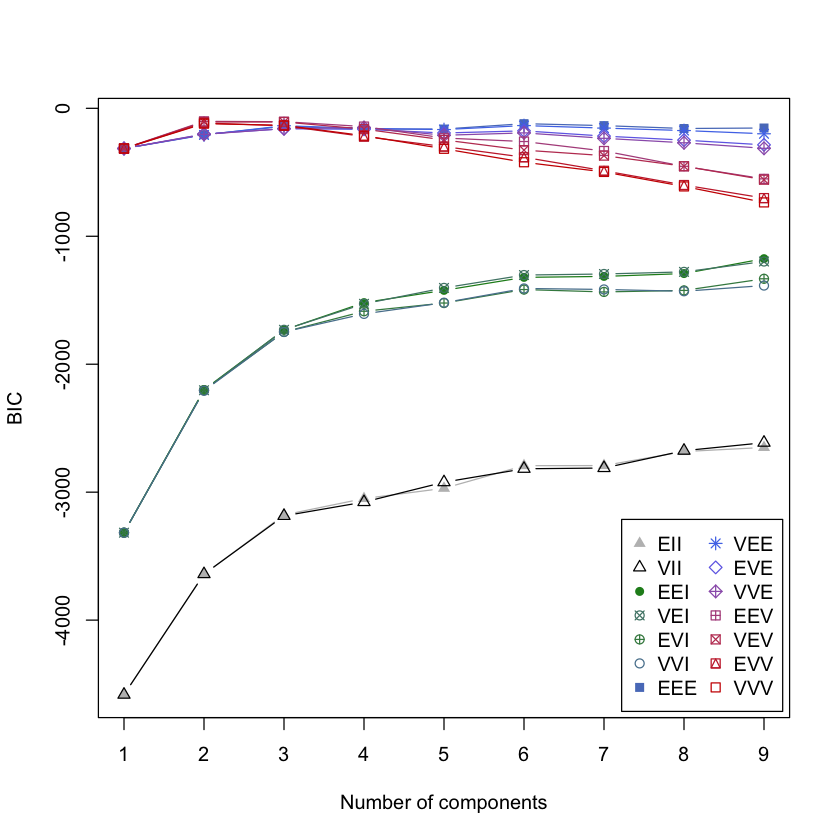

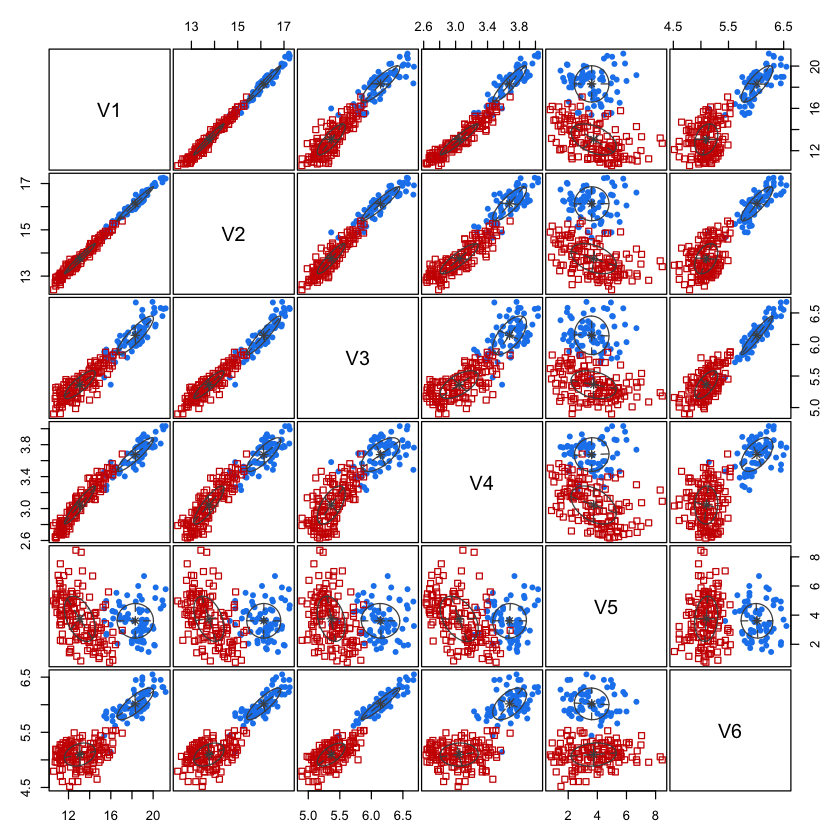

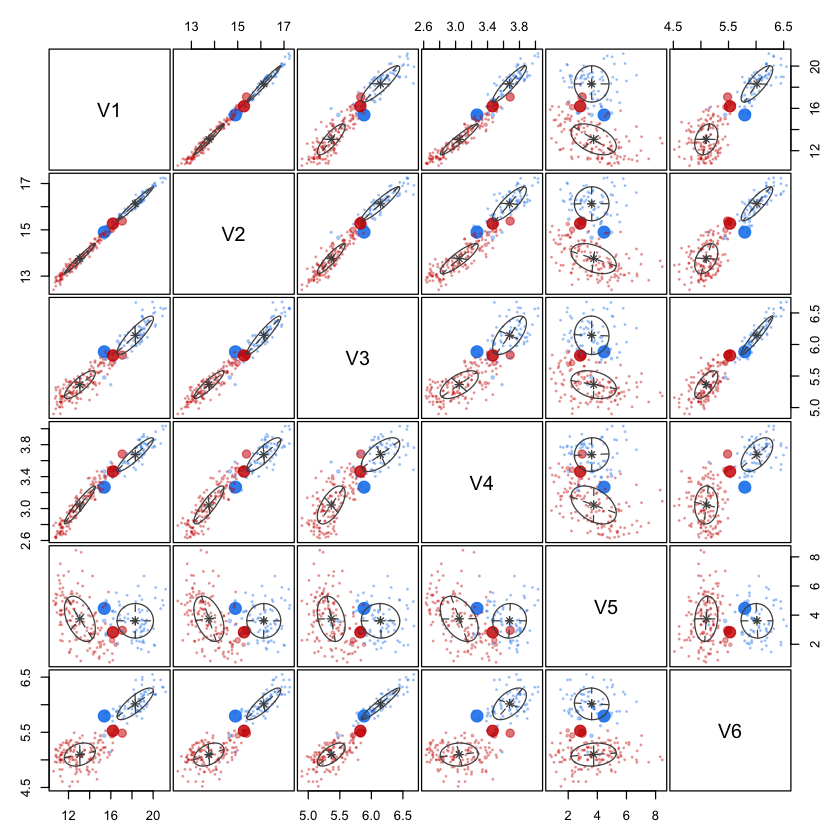

'Mclust' model object: (EEV,2) 

Available components: 
 [1] "call"           "data"           "modelName"      "n"             
 [5] "d"              "G"              "BIC"            "loglik"        
 [9] "df"             "bic"            "icl"            "hypvol"        
[13] "parameters"     "z"              "classification" "uncertainty"   

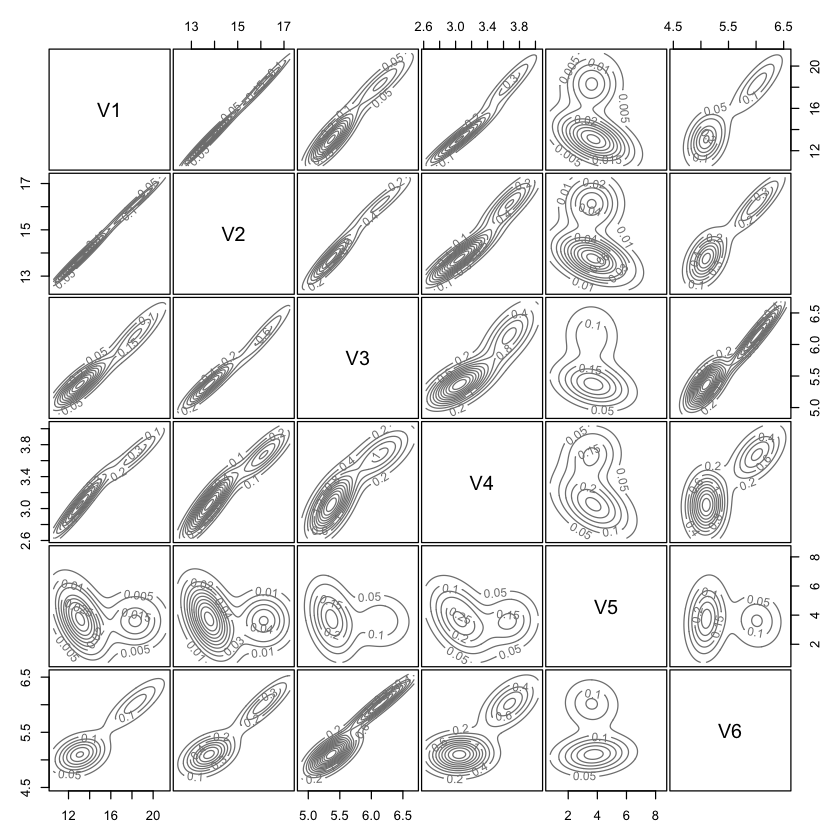

In [14]:
clus <-Mclust(datos)
summary(clus)
plot(clus)
clus


**RESPUESTA A** 
Según el criterio BIC y la visualización del gráfico generado, podemos observar que el primer máximo local se encuentra en G=2. Sin embargo, también se identifican otros máximos locales en G=6 y G=9. A fin de lograr una interpretación más precisa, se recomienda seleccionar un valor para el número de grupos (G) igual a 3.



**En lo que sigue, utilizaremos el método hclust, que permite realizar análisis de agrupamiento jerárquico**

---------------------------------------------------- 
Gaussian finite mixture model fitted by EM algorithm 
---------------------------------------------------- 

Mclust EEV (ellipsoidal, equal volume and shape) model with 3 components: 

 log-likelihood   n df      BIC       ICL
       137.5368 210 71 -104.571 -114.2201

Clustering table:
 1  2  3 
68 83 59 

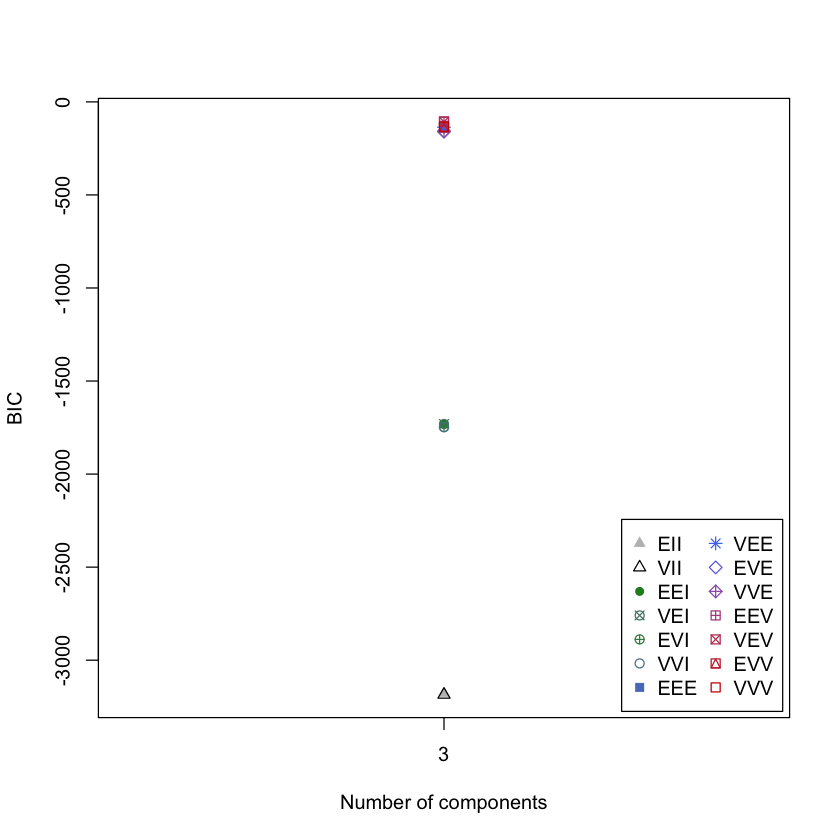

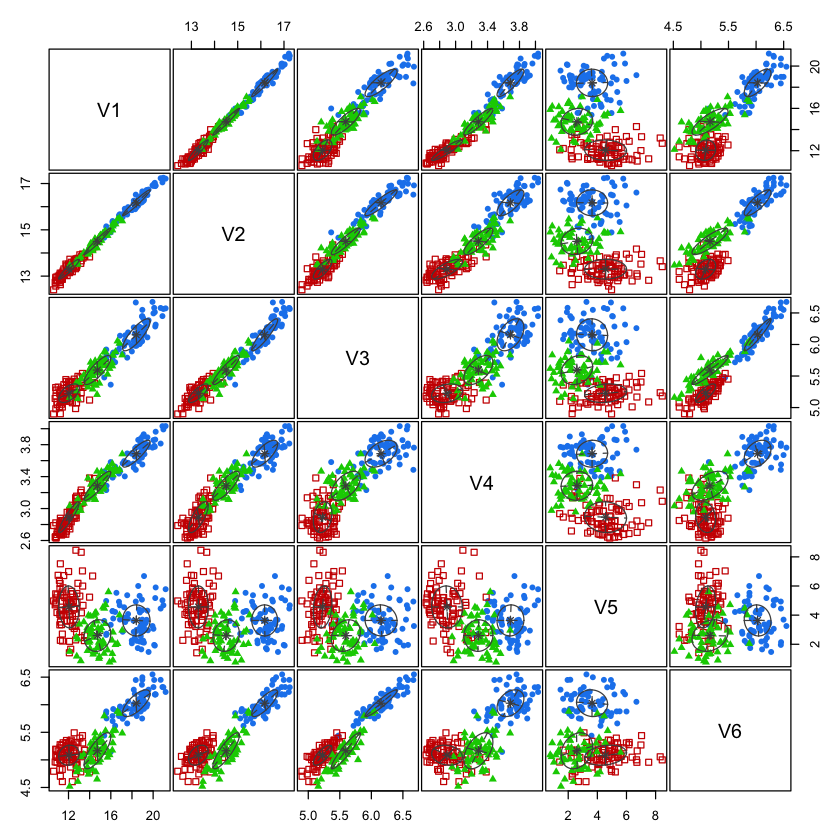

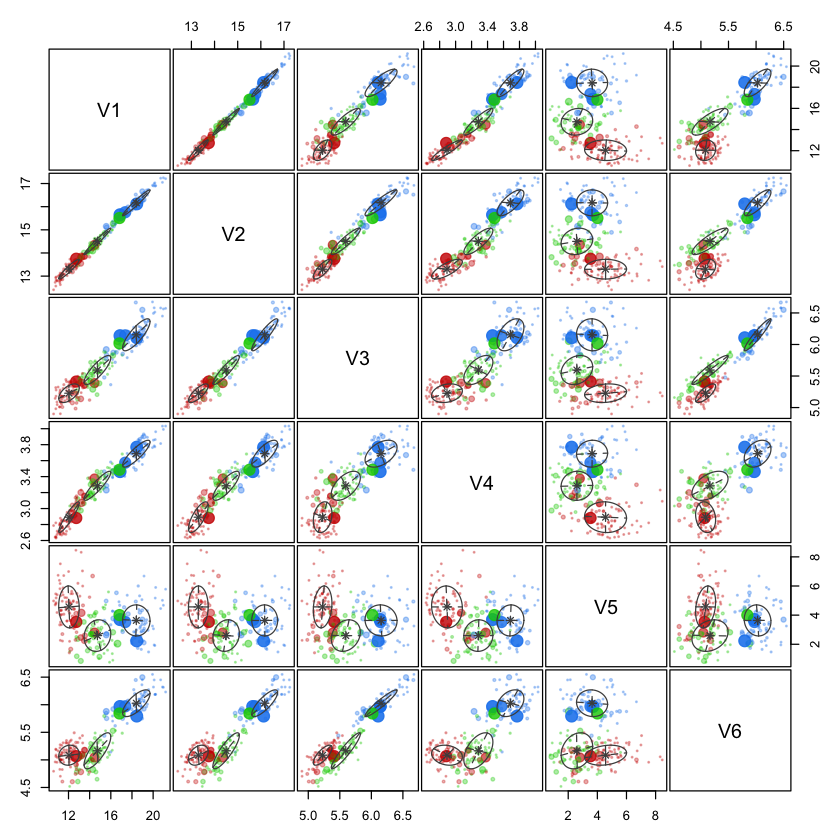

'Mclust' model object: (EEV,3) 

Available components: 
 [1] "call"           "data"           "modelName"      "n"             
 [5] "d"              "G"              "BIC"            "loglik"        
 [9] "df"             "bic"            "icl"            "hypvol"        
[13] "parameters"     "z"              "classification" "uncertainty"   

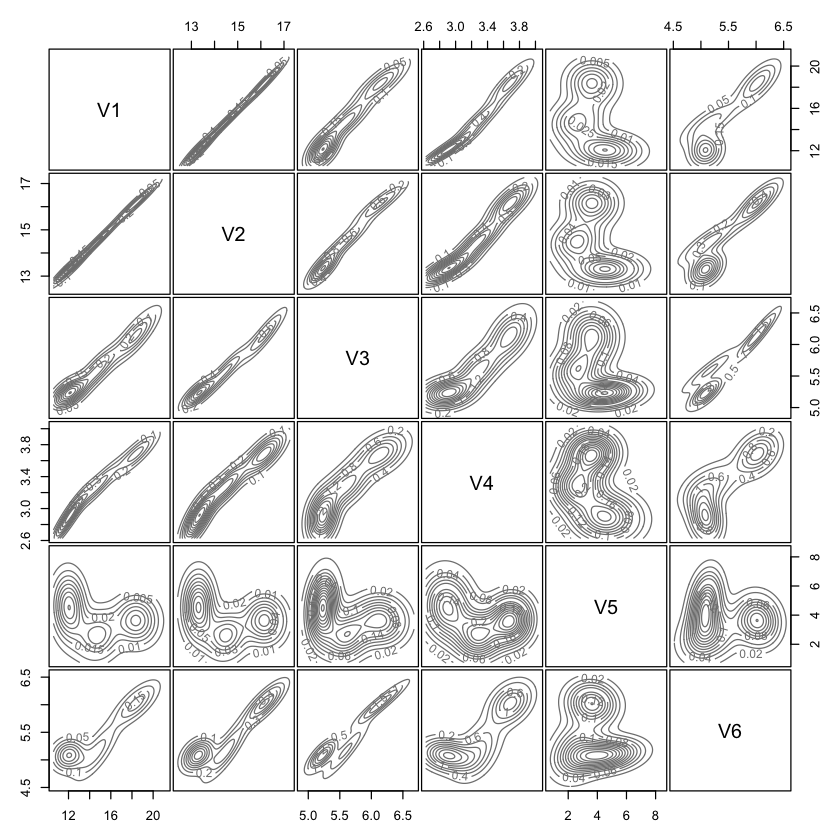

In [15]:
clus <-Mclust(datos, G=3)
summary(clus)
plot(clus)
clus

**RESPUESTA B**
En ambos métodos, se ha determinado que el número óptimo de grupos es 3. Sin embargo, existen diferencias en los resultados obtenidos. Con el algoritmo GMM, se puede determinar que efectivamente los resultados poseen una estructura elíptica, dando lugar a un mejor agrupamiento Gracias al  método BIC.


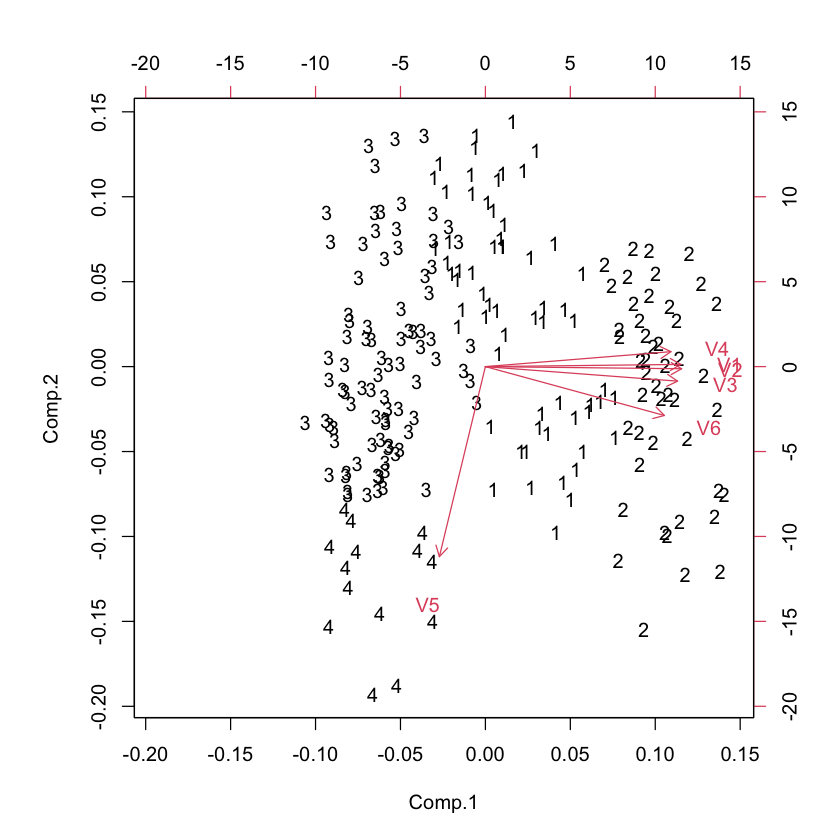

In [18]:
res3 <- hclust(dist(datos))
biplot(res, xlabs= cutree(res3,4))

**Ejercicio 3:** 

a) Explique como funciona el método hclust, describa parámetros de entrada y salida.

b) Interprete y comente los resultados obtenidos. 

c) Utilice otros parámetros en hclust y discuta como varían los resultados. 

**RESPUESTA A**
HCLUST: enfoca su agrupacion en la construccion de jerarquias entre los grupos. Realiza el proceso tomando cada grupo como un ser individual y fusionandolo de en grupos mas generales y grandes.
para determinar el grupo adecuado, se utiliza el corte de dendograma, donde se elige la fusion de grupos que es menos coherente o donde la distancia de los grupos es significativamente mayor.

* d: una matriz de distancias o similitudes.

* method: el método de linkage a utilizar para el clustering jerárquico (por ejemplo, "single", "complete", "average", "ward.D").

* members: una lista que especifica los índices de fila o columna que se deben considerar en la matriz de distancia o similitud.

* keep.dist: un valor lógico que indica si se debe devolver la matriz de distancias como parte del resultado.

* symm: un valor lógico que indica si la matriz de distancia o similitud es simétrica.

en las salidas tenemos las siguientes componentes:


* merge: La matriz de fusión, representada por una matriz de dimensiones (n-1)x2, contiene información sobre los pasos en el algoritmo aglomerativo. Cada fila de la matriz indica la fusión de grupos mediante los índices (con signo -) de las observaciones combinadas, o el número (con signo +) del paso anterior en el que se definió el grupo a fusionar.
 
* height: El vector de alturas, representado por el valor de disimilaridad entre grupos, indica la medida de distancia que condujo a la fusión de dos grupos en cada uno de los n-1 pasos del algoritmo.

* El vector de ordenamiento proporciona una secuencia adecuada de las observaciones originales para su representación gráfica, evitando cruces de ramas en el diagrama.

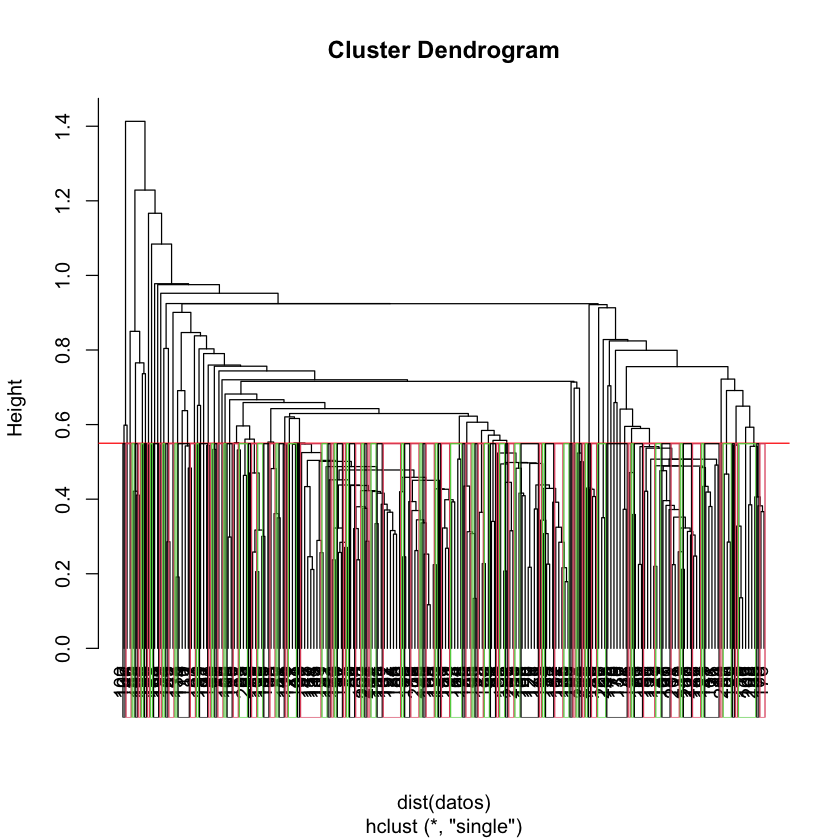

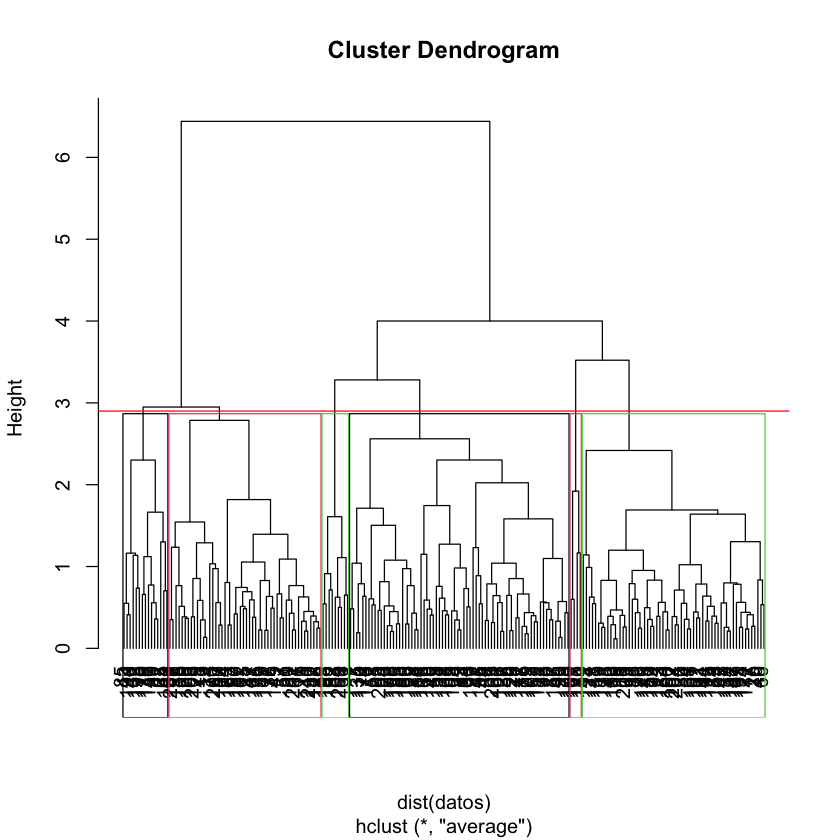

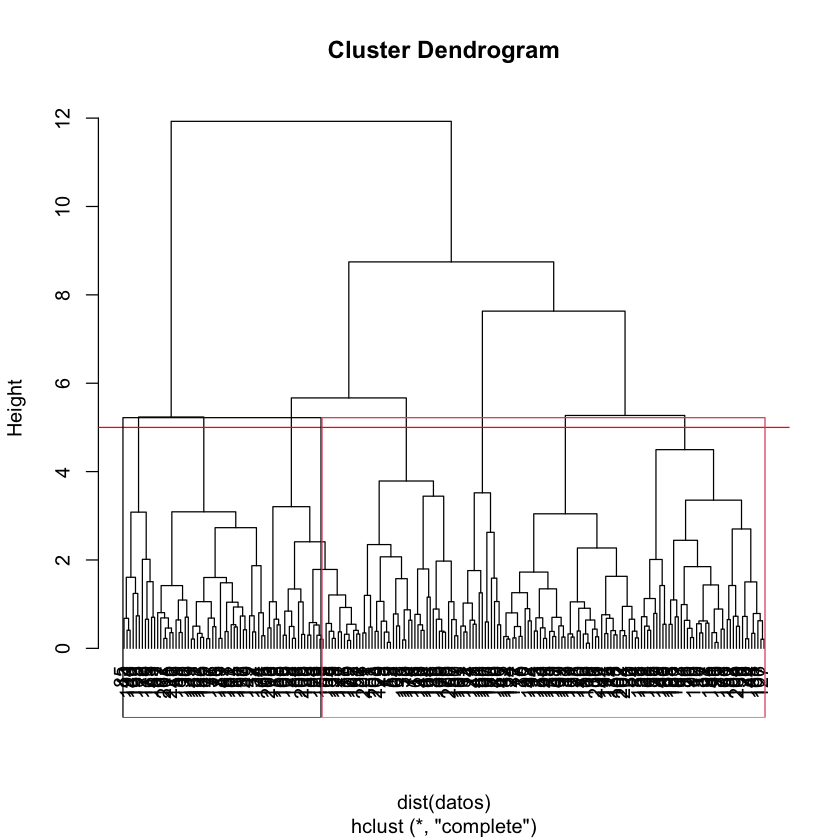

In [19]:
res4 <- hclust(dist(datos),method="single")
res5 <- hclust(dist(datos),method="average")
res6 <- hclust(dist(datos),method="complete") # entre 3 y 2
plot(res4, hang = -1)
abline(h = 0.55, col = "red")
rect.hclust(res5, k=110, border=1:3)

plot(res5, hang = -1)
abline(h = 2.9, col = "red")
rect.hclust(res5, k=6, border=1:3)

plot(res6, hang = -1)
abline(h = 5, col = "red")
rect.hclust(res5, k=2, border=1:3)




**RESPUESTA B**
++++++++

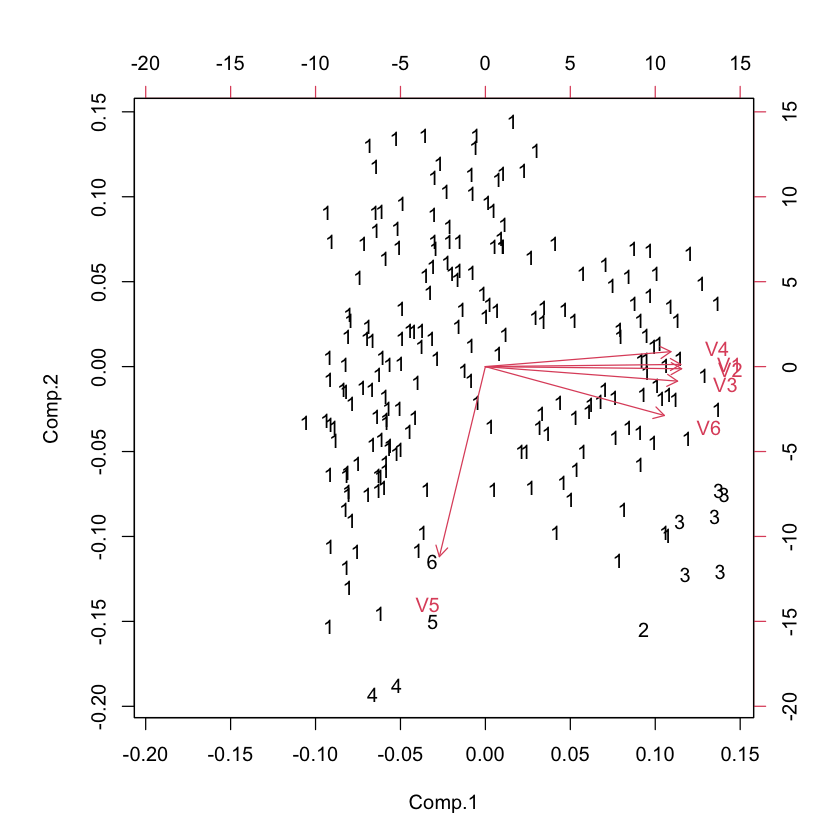

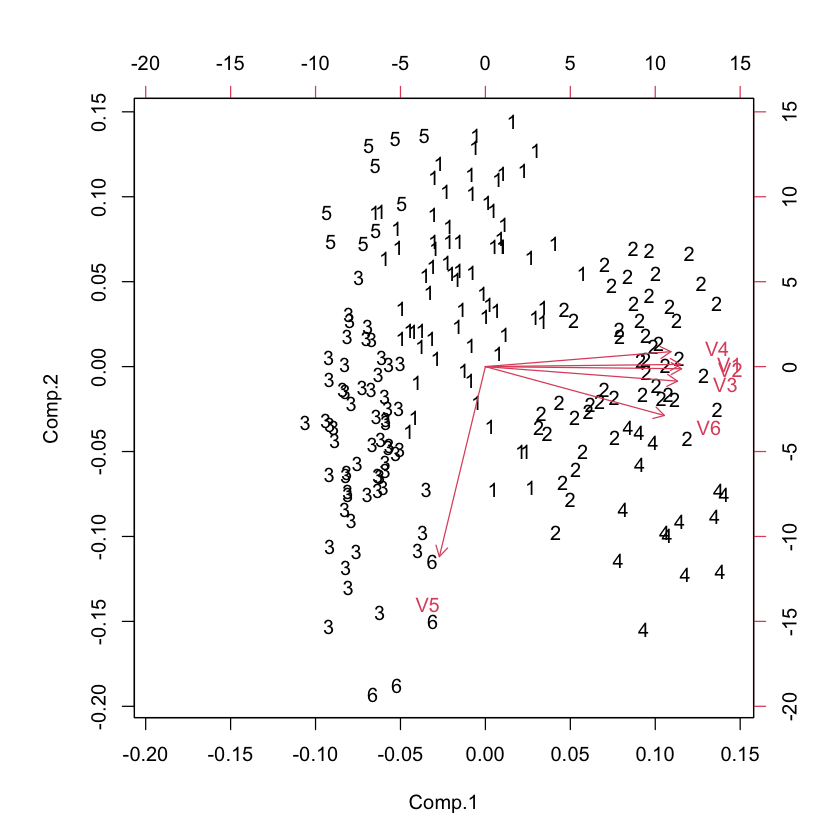

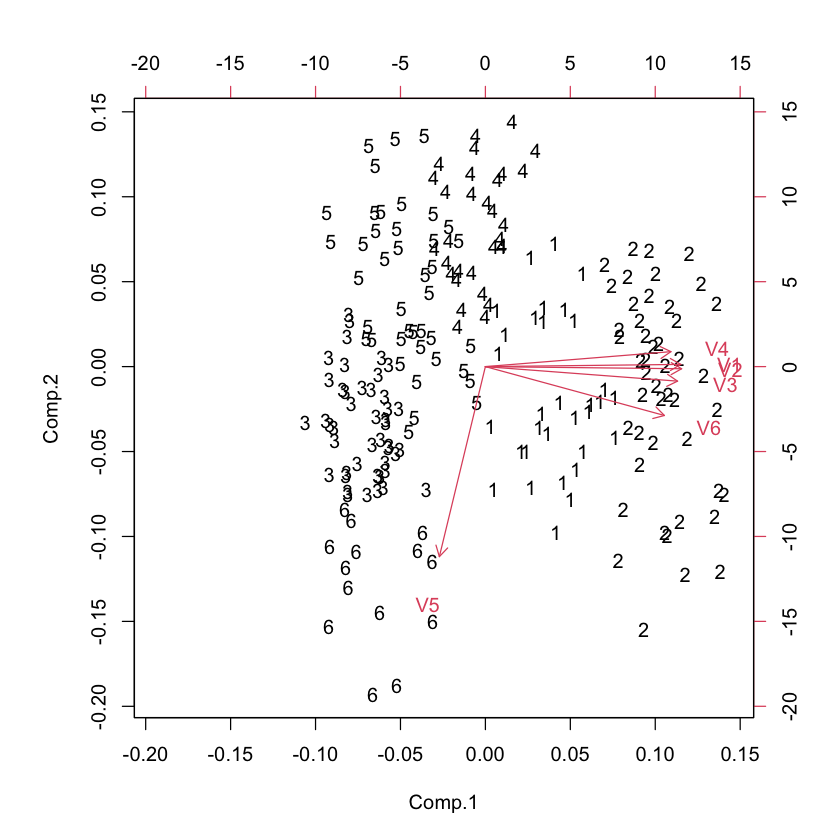

In [29]:
biplot(res, xlabs= cutree(res4,6))
biplot(res, xlabs= cutree(res5,6))
biplot(res, xlabs= cutree(res6,6))

grupos
 1  2  3  4  5  6 
32 47 45 31 41 14 

            Length Class  Mode     
merge       418    -none- numeric  
height      209    -none- numeric  
order       210    -none- numeric  
labels      210    -none- character
method        1    -none- character
call          2    -none- call     
dist.method   1    -none- character

ERROR while rich displaying an object: Error in vapply(part, format, character(nrow(part))): values must be length 6,
 but FUN(X[[2]]) result is length 18

Traceback:
1. tryCatch(withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler), error = outer_handler)
2. tryCatchList(expr, classes, parentenv, handlers)
3. tryCatchOne(expr, names, parentenv, handlers[[1L]])
4. doTryCatch(return(expr), name, parentenv, handler)
5. withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler)
6. repr::mime2repr[[mime]

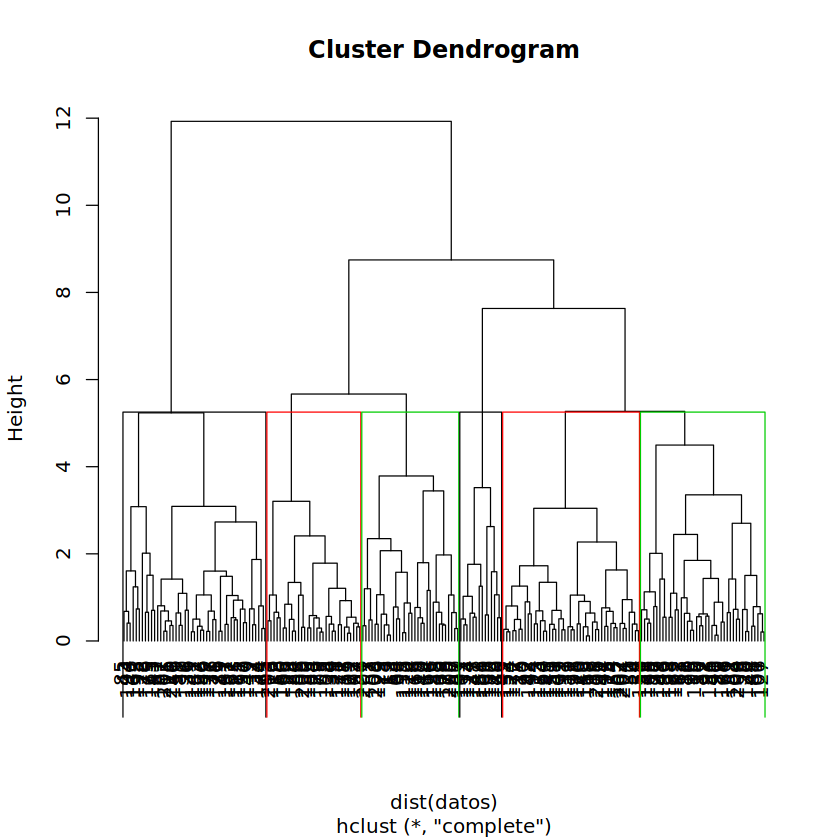

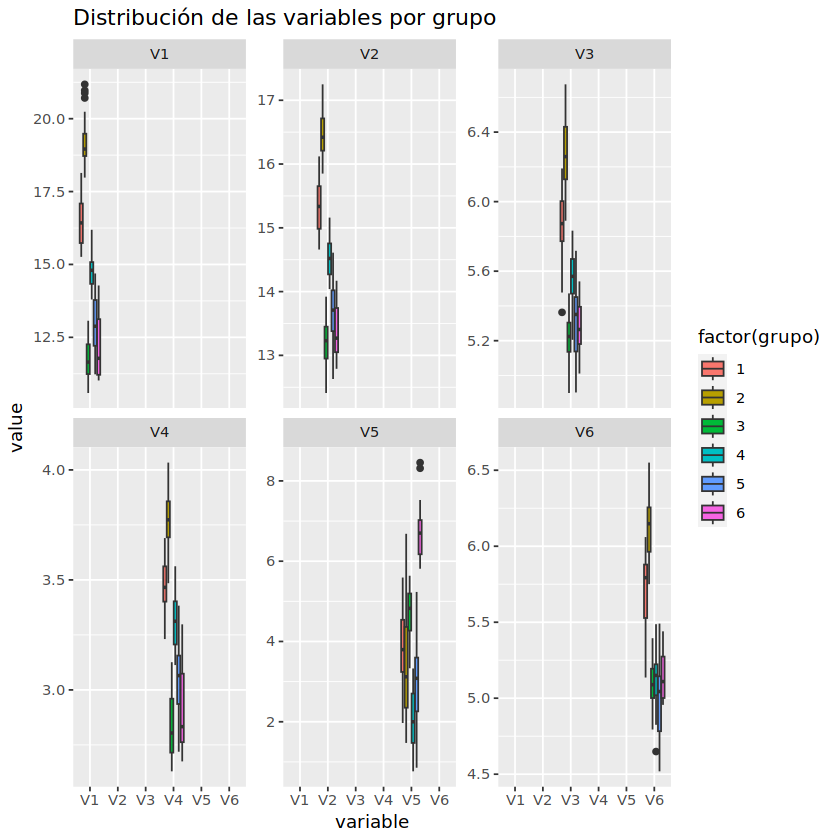

In [31]:
res3 <- hclust(dist(datos))
plot(res3, hang = -1)
rect.hclust(res3, k=6, border=1:3)

# Cortar el dendrograma en 4 grupos y mostrar el resultado
grupos <- cutree(res3, k = 6)
table(grupos)
summary(res3)


estadisticas <- aggregate(datos, by = list(grupos), FUN = function(x) c(media = mean(x), mediana = median(x), sd = sd(x)))
names(estadisticas)[1] <- "Grupo"
estadisticas

# Hacer un boxplot para cada variable y grupo
library(ggplot2)
library(reshape2)
melted <- melt(datos)
melted$grupo <- grupos
ggplot(melted, aes(x = variable, y = value, fill = factor(grupo))) + 
  geom_boxplot() +
  facet_wrap(~variable, scales = "free_y") +
  labs(title = "Distribución de las variables por grupo")

** RESPUESTA B **
- Interpretando los resultados obtenidos realizando en el valor aproximado de 5, da como resultado que la cantidad de grupos optimos en este caso es de 6. El valor "5" se selecciono de forma arbitraria determinando
el punto donde la distancia entre grupos jerarquicos es superior. 
El grupo 2 presenta los valores más altos para V1 y V2, lo que indica que las mediciones de estas variables 
para este grupo son mayores en comparación con los demás grupos. Además, tiene los valores más altos para V6, 
lo que sugiere que los individuos en este grupo son más altos en promedio que los individuos en los otros grupos.

- El grupo 3 tiene los valores más bajos para V1 y V2, lo que sugiere que las mediciones de estas variables para 
este grupo son más bajas en comparación con los demás grupos. También tiene los valores más bajos para V5, lo que 
indica que los individuos en este grupo tienen menos grasa corporal en promedio que los individuos en los otros grupos.

- El grupo 1 presenta valores intermedios para la mayoría de las variables, excepto para V3, donde tiene los valores más 
altos. Esto sugiere que los individuos en este grupo tienen un mayor porcentaje de grasa corporal en comparación con los 
individuos en los otros grupos.

- El grupo 4 tiene valores intermedios para la mayoría de las variables, excepto para V5, donde tiene los valores más bajos.
 Esto indica que los individuos en este grupo tienen un menor porcentaje de grasa corporal en comparación con los individuos 
 en los otros grupos.

- El grupo 5 presenta valores intermedios para la mayoría de las variables, excepto para V6, donde tiene valores ligeramente 
más bajos. Esto sugiere que los individuos en este grupo tienen una estatura ligeramente más baja en comparación con los 
individuos en los otros grupos.

- El grupo 6 tiene los valores más bajos para V2, lo que sugiere que las mediciones de esta variable para este grupo son las 
más bajas en comparación con los demás grupos. Además, tiene valores más altos para V1 y V6, lo que indica que los individuos
en este grupo tienen una masa muscular ligeramente más alta y una estatura ligeramente más alta en comparación con los 
individuos en los otros grupos.

**RESPUESTA C**
En los últimos dos gráficos (average, complete) , se observa una menor diferencia entre los tamaños de los grupos en comparación con el primer gráfico. En el primer gráfico, se puede apreciar que el grupo 1 es significativamente más grande que los otros grupos


**Ejercicio 4:** (3 puntos)

a) Estudie las medidas de calidad propuestas en Murphy, Capítulo 25: purity, rand index y mutual information (pdf en siveducMD) y resuma brevemente en que consisten.

Considere el archivo "semillas.txt" que contiene una séptima variable con la clasificación de las semillas en tres variedades: 
- 1: Kama
- 2: Rosa
- 3: Canadian

b) Realice un análisis de clustering con K-means, GMM y Análisis Jerárquico, con las variables de caracterización de las semillas (V1 a V6)  y considerando K=3 como número de grupos.

c) Calcule alguna de las medidas de calidad estudiadas para los agrupamientos obtenidos en (b), considerando la etiqueta en V7 para sus cálculos. Compare y discuta sus resultados.

**RESPUESTA A**

    a) La pureza es una medida de evaluación utilizada para medir la calidad de los resultados del agrupamiento en el rango 0 <= p <= 1. Esta medida no penaliza por número de grupos, por lo que es posible lograr una pureza 1 de forma trivial al colocar cada objeto en su propio grupo, así cada gruo contendrá sólo instancias de una sola clase, logrando pureza perfecta. Sin embargo esta solución no estructura los datos y es inútil en la mayoría de los casos
    
    b) El rand index es una medida de evaluación utilizada para comparar similitud entre dos agrupamientos. Se calcula considerandos todos los pares de objetos en el conjunto de datos y se clasifican en 4 categorías.
        1. True positives  (TP): se agrupan en el agrupamiento de referencia y en el obtenido.
        2. False positives (FP): no se agrupan en el agrupamiento de referencia pero si en el obtenido.
        3. True negatives  (TN): no se agrupan en el agrupamiento de referencia ni en el obtenido.
        4. False negatives (FN): se agrupan en el agrupamiento de referencia pero no en el obtenido.
    Luego se calcula de la siguiente forma
        rand_index = (TP+TN) / (TP+FP+TN+FN), donde rand_index = 1 indica concordancia perfecta y rand_index = 0 indica que los agrupamientos son completamente diferentes.
        
        c) Mutual information es una medida que nos dice cuánta información en común comparte el agrupamiento obtenido de los valores reales asignados a cada instancia del conjunto de datos (que grupo/categoría pertenencen). 
        En el contexto de agrupamiento se utilizan para saber que tan bien los agrupamientos obtenidos reflejan la información contenida en los grupos verdaderos. Una alta información mutua significa que los agrupamientos obtienen eficientemente la estructura de las clases.

In [23]:
datos1 <-read.table("..//data//semillas.txt",dec=".")
summary(datos1)

       V1              V2              V3              V4       
 Min.   :10.59   Min.   :12.41   Min.   :4.899   Min.   :2.630  
 1st Qu.:12.27   1st Qu.:13.45   1st Qu.:5.262   1st Qu.:2.944  
 Median :14.36   Median :14.32   Median :5.524   Median :3.237  
 Mean   :14.85   Mean   :14.56   Mean   :5.629   Mean   :3.259  
 3rd Qu.:17.30   3rd Qu.:15.71   3rd Qu.:5.980   3rd Qu.:3.562  
 Max.   :21.18   Max.   :17.25   Max.   :6.675   Max.   :4.033  
       V5              V6              V7   
 Min.   :0.765   Min.   :4.519   Min.   :1  
 1st Qu.:2.562   1st Qu.:5.045   1st Qu.:1  
 Median :3.599   Median :5.223   Median :2  
 Mean   :3.700   Mean   :5.408   Mean   :2  
 3rd Qu.:4.769   3rd Qu.:5.877   3rd Qu.:3  
 Max.   :8.456   Max.   :6.550   Max.   :3  

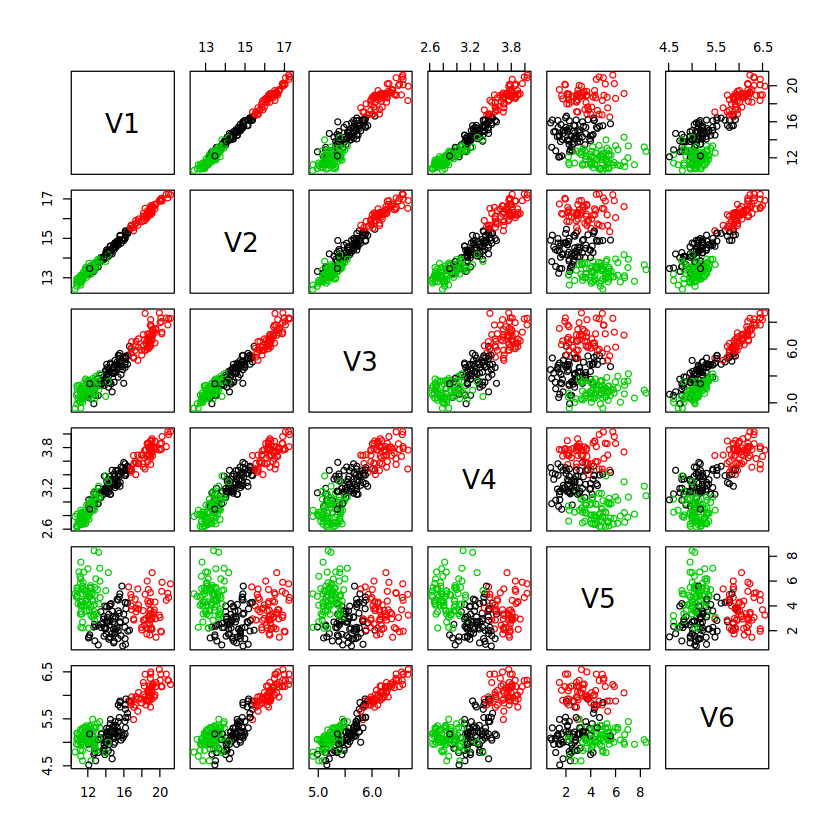

Comp.1     Comp.2     Comp.3      Comp.4      Comp.5       Comp.6      
1 -0.2189232  0.7985683  0.16423218  0.08015012 -0.010906320 -0.014971476
2  2.9205042 -0.2730151 -0.03930464 -0.04246970  0.010152392  0.007972724
3 -2.1089388 -0.5304285 -0.12243032 -0.04130075  0.002155313  0.007683248

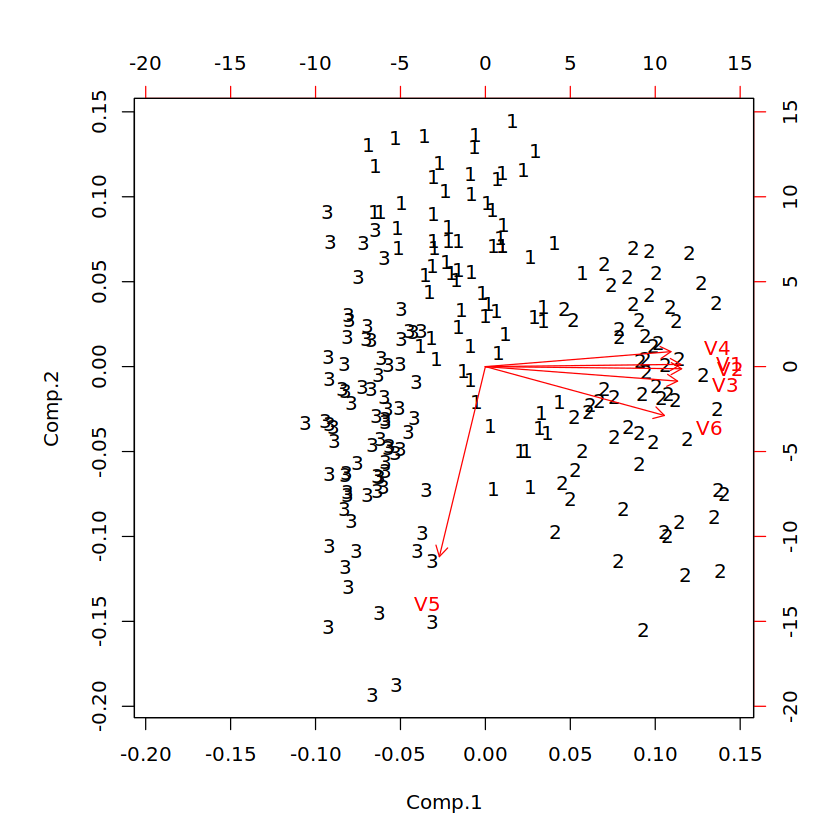

In [24]:
###b)

data_filtrada=datos1[,1:6]


k0=3

## para km
km<-kmeans(datos,k0,iter.max=1000,nstart=10)
#grafica los datos coloreados con el grupo asignado en planos de pares de variables
pairs(datos,col=km$cluster)



comp <- princomp(data_filtrada, cor=TRUE)
flower_pred <- predict(comp,km$centers)
biplot(comp,xlabs=km$cluster)
flower_pred
km_cl <- km$cluster


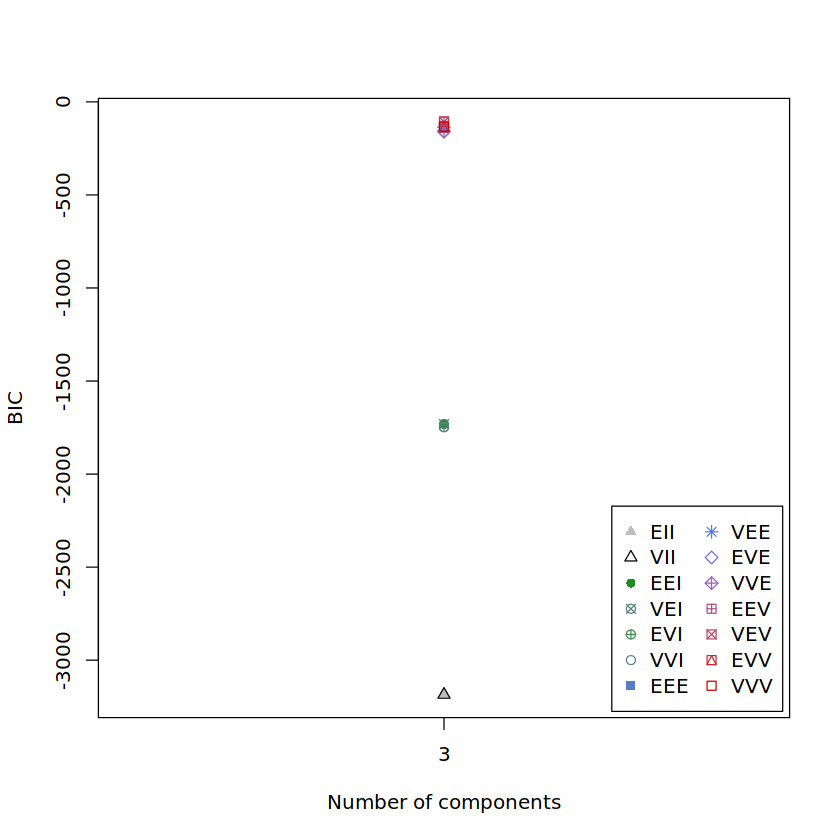

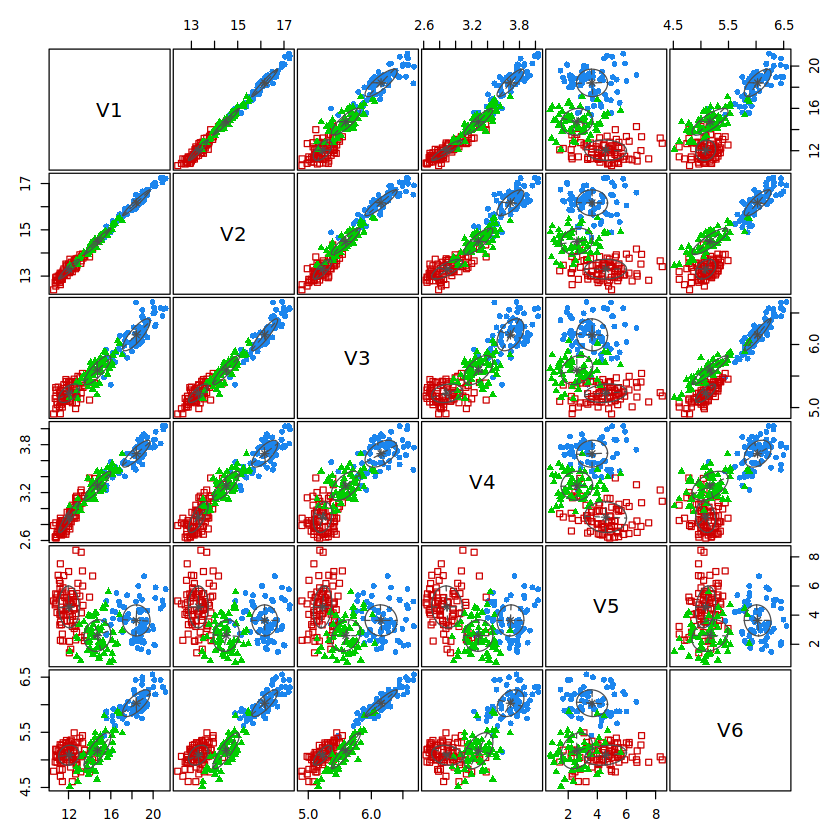

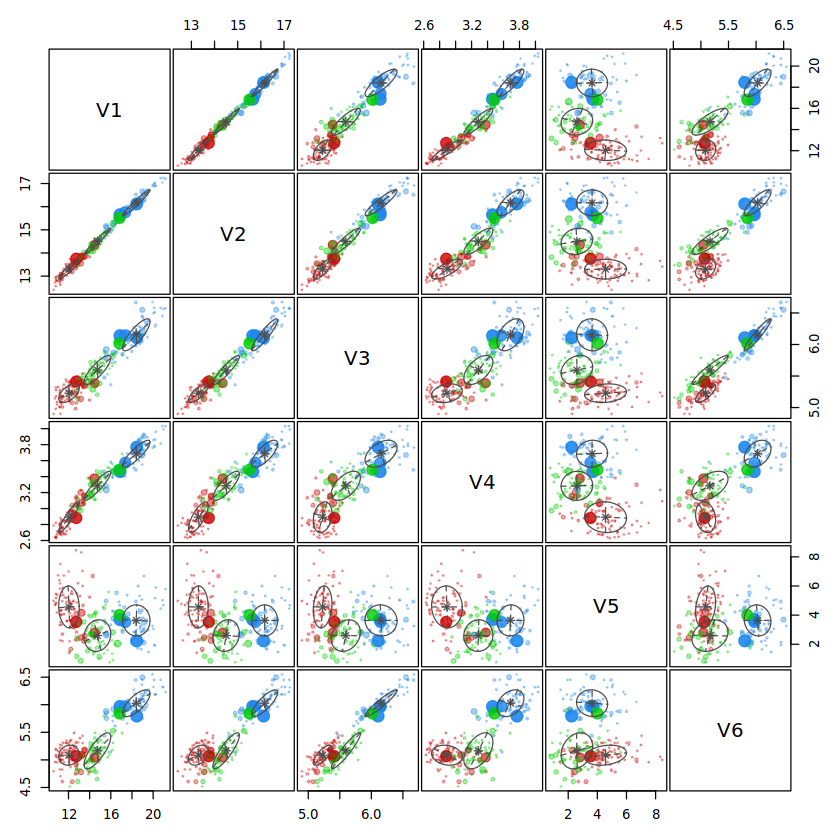

  9 120 139 194  49  12  10  14  92  66 168  23 123  81 105 188 182 133 134 193 
  3   1   1   2   3   3   3   3   1   3   2   3   1   1   1   2   2   3   1   2 
190 114  56 174 167  38 165  69  55 112  53  28 203  45 137  99 109 178  48 169 
  2   1   3   2   2   3   2   3   3   1   3   3   2   3   1   1   1   2   3   2 
199 189  78  41 144  89  98 198 143 176  88  61 125 164  16  30  76  26 117 185 
  2   2   1   2   2   1   1   2   2   2   1   2   1   2   3   3   1   3   1   2 
  4 111  63  32  82  65 119 136  77 141  86  57 101  91  29 102  13  79  50  72 
  3   1   2   3   1   3   1   1   1   2   1   2   1   1   3   1   3   1   3   1 
126  60  19  25  90 206 202  42  70 149 181 197  43 195  47 209  87 155 158 208 
  1   3   3   3   1   2   2   2   2   2   2   2   2   2   3   2   1   2   2   2 
146 191  96  24  35  34   3  39   8  36 113 200 205 172 160   5  22 135 154  15 
  2   2   1   2   3   3   3   3   3   3   1   2   2   2   2   3   3   1   2   3 
170  74  20 163 100 122  68 

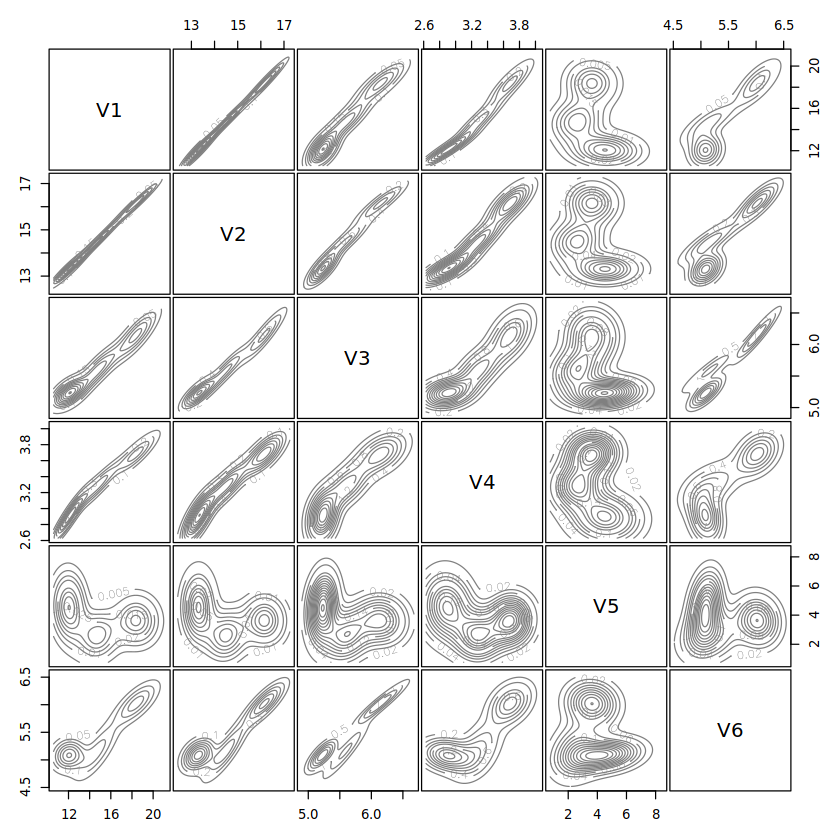

In [25]:
##GMM
gmm <- Mclust(data_filtrada,k0)
plot(gmm)
print(gmm$classification)

gmm_cl <- gmm$classification

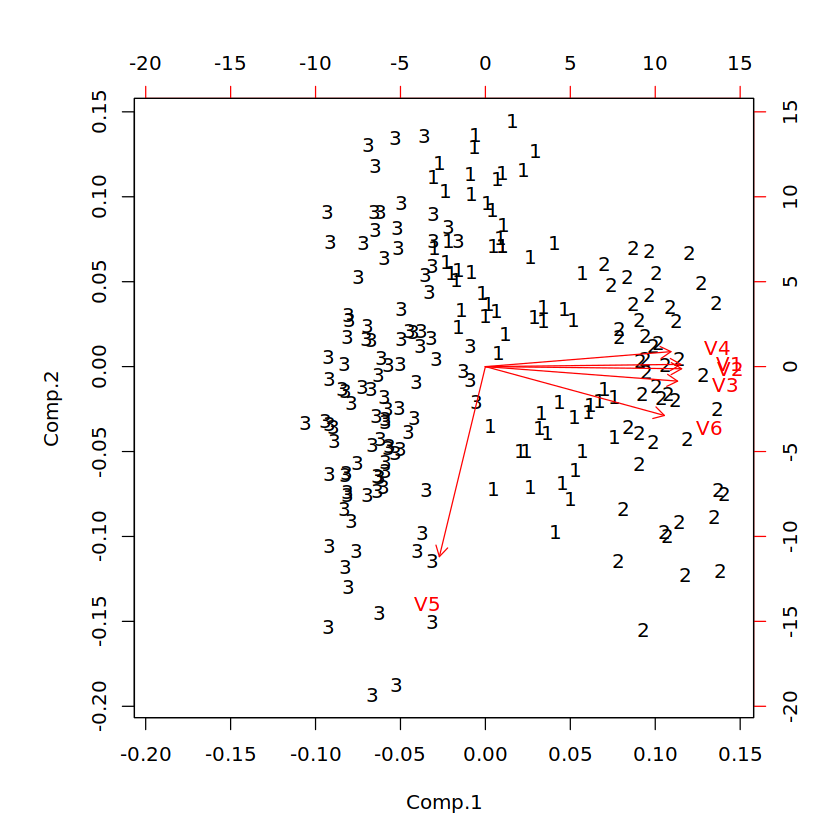

In [26]:
#  Análisis Jerárquico

hclust <-  hclust(dist(data_filtrada))
comp <- princomp(data_filtrada, cor = TRUE)
biplot(comp, xlabs= cutree(hclust,3))


cutree_vector <- cutree(hclust, k = 3)


### c)

In [27]:
calcular_purity <- function(predicciones, verdaderas) {
  # Crear una matriz de contingencia para contar las asignaciones de grupo y clase
  matriz_contingencia <- table(predicciones, verdaderas)
  
  # Sumar el valor máximo en cada columna (grupo) para obtener el total de asignaciones correctas
  purity <- sum(apply(matriz_contingencia, 2, max)) / length(predicciones)
  
  return(purity)
}

In [28]:
purity_km <-calcular_purity(datos1$V7, km_cl)
purity_km

[1] 0.8952381

In [29]:
purity_gmm <- calcular_purity(datos1$V7, gmm_cl)
purity_gmm

[1] 0.9285714

In [30]:
purity_hierarchical <-calcular_purity(datos1$V7, cutree_vector)
purity_hierarchical

[1] 0.747619

    Se puede observar que la pureza de K-means es relativamente alta, con aproximadamente 89.5%, lo que indica que la mayoría de las asignaciones de grupos coinciden con las etiquetas reales. 
    Luego podemos ver que la pureza de GMM es del 92.8%, por lo que tiene una mejor calidad en la asignación de clases a los grupos, esto puede ser debido a que el modelo de mezclas Gaussianas puede capturar relaciones más complejas que K-means, lo que puede contribuir a una mejor separación de las clases.
    Por último tenemos que el nivel de pureza del agrupamiento jerárquico es del 74.6%, el más bajo de todos.
    
    Podemos concluir entonces que los datos obtenidos se pueden debear a que GMM es más flexible, permitiendo grupos con formas elípticas y varianzas diferentes. También nos entrega información sobre la probabilidad de pertenencia de un punto a cada grupo, por lo que nos permite superar los casos donde se presenta una superposición de clases. En el caso del agrupamiento jerárquico es probable que este nivel de superposición en los datos haga que a medida que se fusionan los grupos en el proceso de agrupamiento, algunas de las asignaciones se vuelvan ambigüas, bajando el nivel de pureza.